У нас  имеются данные о глобальных продажах видеоигр с их оценками критиками и пользователями.
Мои гипотезы:
*  Работа над улучшением оценок критиков увеличит продажи
*  Работа над качеством продукта и улучшением оценок игроков увеличит продажи


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#Импортируем файл данных

In [3]:
data = pd.read_csv("/content/Video_Games_Sales_as_at_22_Dec_2016.csv")

#Выводим первые строки

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# Получаем инфорамцию о типах данных в колонках

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


#Проверяем гипотезу о влиянии оценок **критиков** на продажи

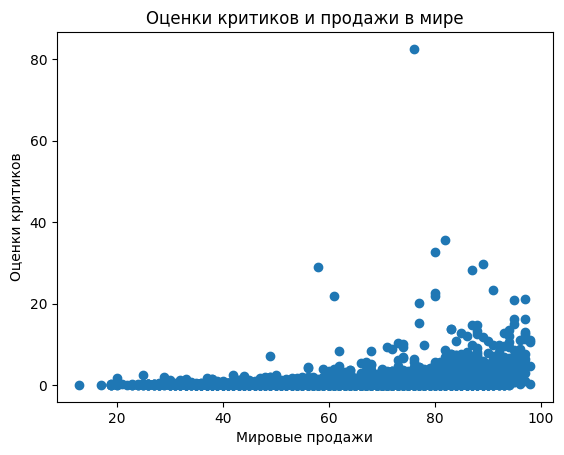

In [6]:
plt.scatter(data['Critic_Score'], data['Global_Sales'])
plt.ylabel('Оценки критиков')
plt.xlabel('Мировые продажи')
plt.title('Оценки критиков и продажи в мире')
plt.show()

Видим, что оценки критиков ничтожно влияют на продаже в мире. Можем проверить влияние на продажи по другим регионам.

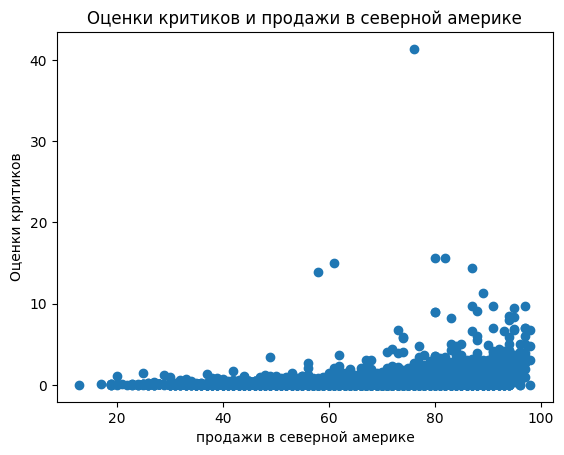

In [7]:
plt.scatter(data['Critic_Score'], data['NA_Sales'])
plt.ylabel('Оценки критиков')
plt.xlabel('продажи в северной америке')
plt.title('Оценки критиков и продажи в северной америке')
plt.show()

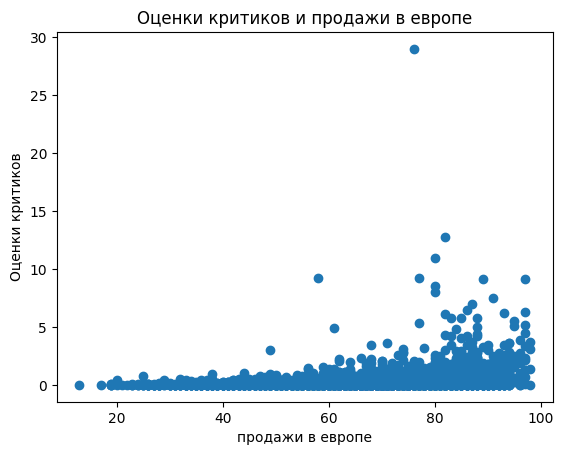

In [8]:
plt.scatter(data['Critic_Score'], data['EU_Sales'])
plt.ylabel('Оценки критиков')
plt.xlabel('продажи в европе')
plt.title('Оценки критиков и продажи в европе')
plt.show()

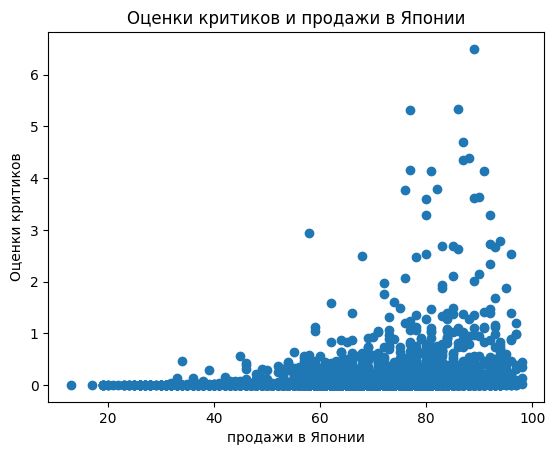

In [9]:
plt.scatter(data['Critic_Score'], data['JP_Sales'])
plt.ylabel('Оценки критиков')
plt.xlabel('продажи в Японии')
plt.title('Оценки критиков и продажи в Японии')
plt.show()

Видим, что самая заметная кореляция присутствует на японском рынке, однако она все еще ничтожно мала.

#Проверяем гипотезу о влиянии оценок **пользователей** на продажи

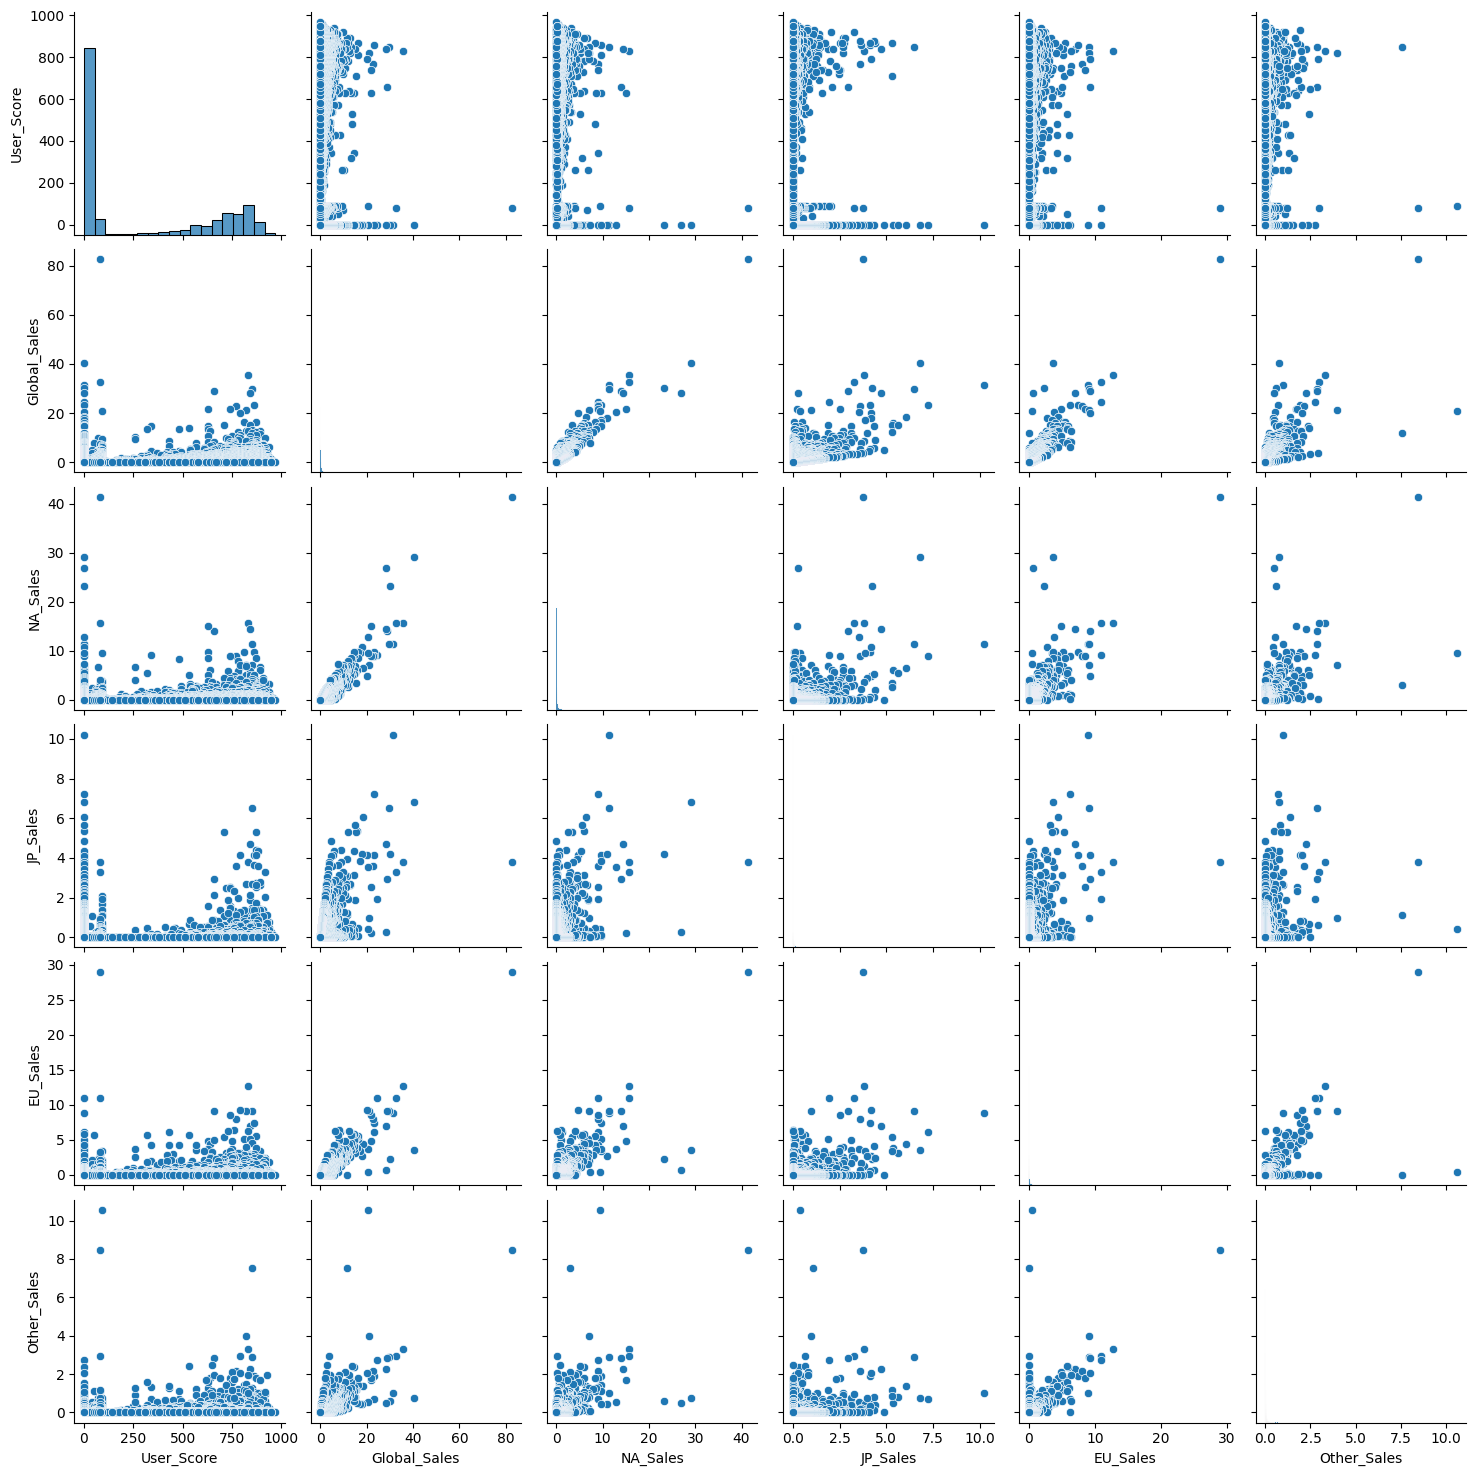

In [17]:
# Заменяем "tbd" на NaN (пропущенные значения)
data['User_Score'] = data['User_Score'].replace('tbd', pd.NA)

# Преобразуем столбец в числа с плавающей точкой
data['User_Score'] = data['User_Score'].astype(float)

# Умножаем значения с плавающей точкой на 10 и преобразовываем их в int
data['User_Score'] = (data['User_Score'] * 10).fillna(0).astype(int)

# Создаем pairplot
sns.pairplot(data[['User_Score', 'Global_Sales', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales']])
plt.show()


Из матрицы кареляции видно, что влияние оценок пользователей на продажи так же минимально.

#Вывод
Ни одна из гипотез не подтвердилась. Кареляции продаж с оценками носит несущественный характер, следовательно ей можно принебречь в стратегии развития.